In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

#Load the dataset with a limited number of samples
def load_data(num_samples=1000):
    (train_dataset, val_dataset), dataset_info = tfds.load(
        'coco/2017', split=['train', 'validation'], with_info=True, as_supervised=False)
    train_dataset = train_dataset.take(num_samples)
    val_dataset = val_dataset.take(num_samples)
    return train_dataset, val_dataset, dataset_info

#An initial Preprocess for the data
def preprocess_data(sample):
    image, data = sample['image'], sample['objects']
    image = tf.image.resize(image, (416, 416))  # Resize to YOLO input size
    return image.astype(np.uint8), data

#Load data with only 1000 samples
train_dataset, val_dataset, info = load_data(1000)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/118287 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/coco/2017/1.1.0.incompleteNILRO3/coco-train.tfrecord*...:   0%|          |…

Generating validation examples...:   0%|          | 0/5000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/coco/2017/1.1.0.incompleteNILRO3/coco-validation.tfrecord*...:   0%|      …

Generating test examples...:   0%|          | 0/40670 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/coco/2017/1.1.0.incompleteNILRO3/coco-test.tfrecord*...:   0%|          | …

Dataset coco downloaded and prepared to /root/tensorflow_datasets/coco/2017/1.1.0. Subsequent calls will reuse this data.


In [ ]:
'''
import tensorflow as tf
import tensorflow_datasets as tfds

#Load the dataset with a limited number of samples
def load_data(num_samples=1000):
    (train_dataset, val_dataset), dataset_info = tfds.load(
        'voc/2007', split=['train', 'validation'], with_info=True, as_supervised=False)
    train_dataset = train_dataset.take(num_samples)
    val_dataset = val_dataset.take(num_samples)
    return train_dataset, val_dataset, dataset_info

#An initial Preprocess for the data
def preprocess_data(sample):
    image, data = sample['image'], sample['objects']
    image = tf.image.resize(image, (416, 416))  # Resize to YOLO input size
    return image, data

#Load data with only 1000 samples
train_dataset, val_dataset, info = load_data(1000)
'''

In [3]:
# print info using the meta data provided by the tfds
def print_dataset_info(dataset_info):
    print(f"Dataset Name: {dataset_info.name}")
    print(f"Full Name: {dataset_info.full_name}")
    print("Description:", dataset_info.description.strip())
    print("Configuration Description:", dataset_info.config_description.strip())
    print(f"Homepage: {dataset_info.homepage}")
    print(f"Data Directory: {dataset_info.data_dir}")
    print(f"File Format: {dataset_info.file_format}")
    print(f"Download Size: {dataset_info.download_size}")
    print(f"Dataset Size: {dataset_info.dataset_size}")
    print("\nFeatures:")
    for feature_name, feature_details in dataset_info.features.items():
        print(f"  {feature_name}: {feature_details}")
    print("\nSplits:")
    for split_name, split_details in dataset_info.splits.items():
        print(f"  {split_name.capitalize()}: {split_details.num_examples} examples in {split_details.num_shards} shards")
    print("\nCitation:\n", dataset_info.citation)

# Assuming dataset_info is already defined and populated
print_dataset_info(info)

Dataset Name: coco
Full Name: coco/2017/1.1.0
Description: COCO is a large-scale object detection, segmentation, and
captioning dataset.

Note:
 * Some images from the train and validation sets don't have annotations.
 * Coco 2014 and 2017 uses the same images, but different train/val/test splits
 * The test split don't have any annotations (only images).
 * Coco defines 91 classes but the data only uses 80 classes.
 * Panotptic annotations defines defines 200 classes but only uses 133.
Configuration Description: 
Homepage: http://cocodataset.org/#home
Data Directory: /tmp/tmp1xx_bugdtfds
File Format: FileFormat.TFRECORD
Download Size: 25.20 GiB
Dataset Size: 24.98 GiB

Features:
  image: Image(shape=(None, None, 3), dtype=uint8)
  image/filename: Text(shape=(), dtype=string)
  image/id: Tensor(shape=(), dtype=int64)
  objects: Sequence({
    'area': int64,
    'bbox': BBoxFeature(shape=(4,), dtype=float32),
    'id': int64,
    'is_crowd': bool,
    'label': ClassLabel(shape=(), dtype

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

# Take one sample from the training set
for sample in train_dataset.take(1):
    image, filename, objects = (
        sample['image'],
        sample['image/filename'],
        sample['objects']
    )

    # Print the image filename for reference
    print(f"Filename: {filename.numpy().decode('utf-8')}")

    # Access the first object's bounding box and label
    first_bbox = objects['bbox'][0].numpy()
    first_label_index = objects['label'][0].numpy()

    # Get the label name using the label index
    first_label_name = info.features['objects']['label'].int2str(first_label_index)

    # Print the bounding box and label
    print("First bounding box: [ymin, xmin, ymax, xmax]")
    print(f"First bounding box: {first_bbox}")
    print(f"Label index: {first_label_index}, Label name: {first_label_name}")

Filename: 000000460139.jpg
First bounding box: [ymin, xmin, ymax, xmax]
First bounding box: [0.54380953 0.13464062 0.98651516 0.33742186]
Label index: 3, Label name: motorcycle


In [5]:
def preprocess_data(sample):
    image, data = sample['image'], sample['objects']
    image = tf.image.resize(image, (416, 416))  # Resize to YOLO input size
    image = tf.convert_to_tensor(image)
    image = image.numpy()  # Convert to NumPy array
    image = image.astype(np.uint8)
    return image, data

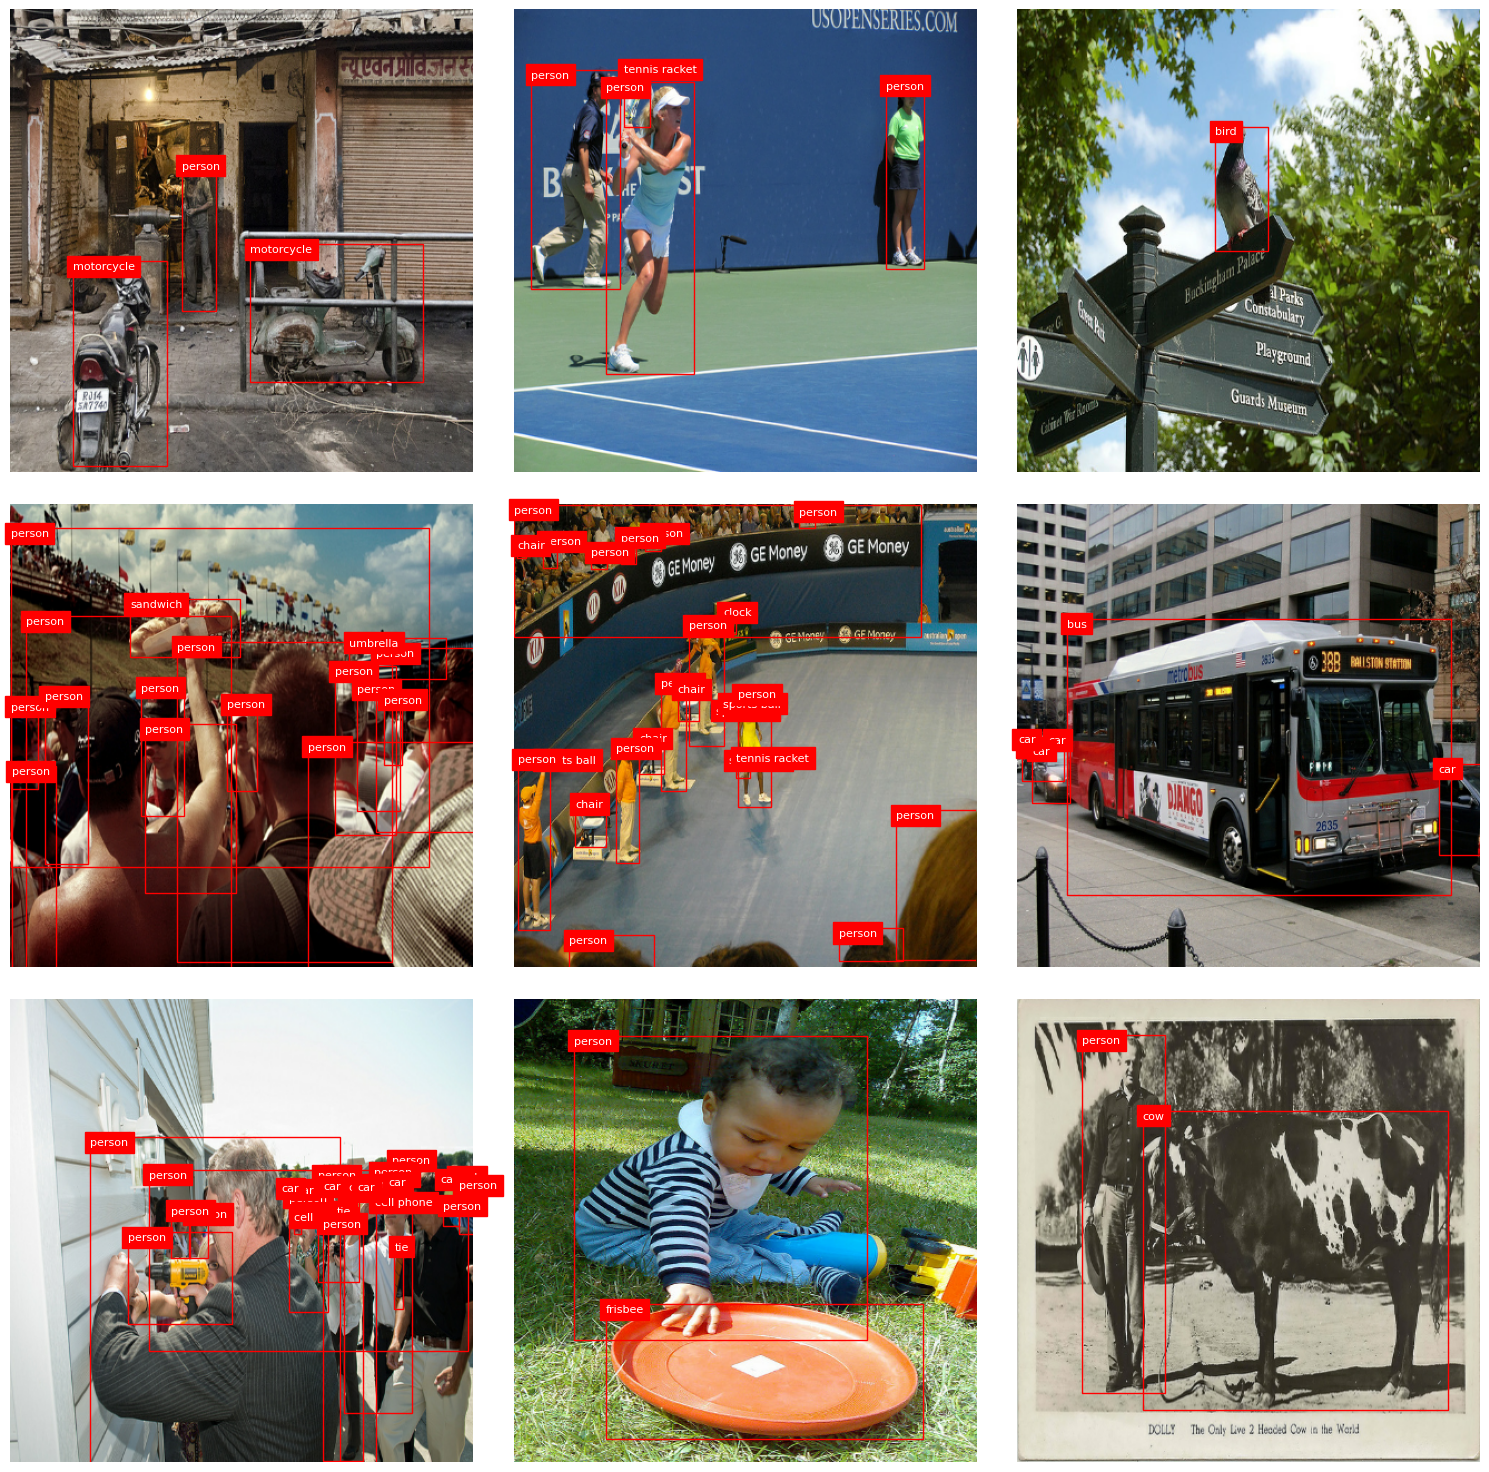

In [6]:
def get_label_name(label_index, info):
    return info.features['objects']['label'].int2str(label_index)

def visualize_data(batch, info):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    axs = axs.ravel()

    for i, sample in enumerate(batch.take(9)):
        image, data = preprocess_data(sample)
        axs[i].imshow(image)  # Use the image directly

        for bbox, label_index in zip(data['bbox'], data['label']):
            y_min, x_min, y_max, x_max = bbox
            label_name = get_label_name(label_index.numpy(), info)
            rect = patches.Rectangle((x_min * 416, y_min * 416),
                                     (x_max - x_min) * 416,
                                     (y_max - y_min) * 416,
                                     linewidth=1, edgecolor='r', facecolor='none')
            axs[i].add_patch(rect)
            axs[i].text(x_min * 416, y_min * 416, label_name,
                        verticalalignment='top', color='white', fontsize=8, backgroundcolor='red')

        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage, assuming 'train_dataset' and 'info' are defined
visualize_data(train_dataset, info)

In [7]:
!pip install -q keras_cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 15.1 MB/s eta 0:00:00


In [8]:
import keras_cv

Using TensorFlow backend


In [9]:
# let's override the old preprocessing data
def preprocess_data(sample, bounding_box_format= "xywh"):
    image = sample["image"]
    image = tf.image.resize(image, (640, 640))  # Resize to YOLO input size
    #image = image / 255.0 # rescale the image

    boxes = keras_cv.bounding_box.convert_format(
        sample["objects"]["bbox"],
        images=image,
        source="rel_yxyx",
        target=bounding_box_format,
    )
    bounding_boxes = {
        "classes": sample["objects"]["label"],
        "boxes": boxes,
    }
    return {"images": image, "bounding_boxes": bounding_boxes}

train_ds = train_dataset.map(preprocess_data).ragged_batch(4, drop_remainder=True)
eval_ds = val_dataset.map(preprocess_data).ragged_batch(4, drop_remainder=True)

In [10]:
# Get the label names from the metadata
label_names = info.features['objects']['label'].names
label_names
class_ = dict(zip(range(len(label_names)), label_names))

In [11]:
def visualize_dataset(inputs, value_range, rows, cols, bounding_box_format):
    inputs = next(iter(inputs.take(1)))
    images, bounding_boxes = inputs["images"], inputs["bounding_boxes"]
    keras_cv.visualization.plot_bounding_box_gallery(
              images,
              value_range=value_range,
              rows=rows,
              cols=cols,
              y_true=bounding_boxes,
              scale=5,
              font_scale=0.7,
              bounding_box_format=bounding_box_format,
              class_mapping=class_,
          )

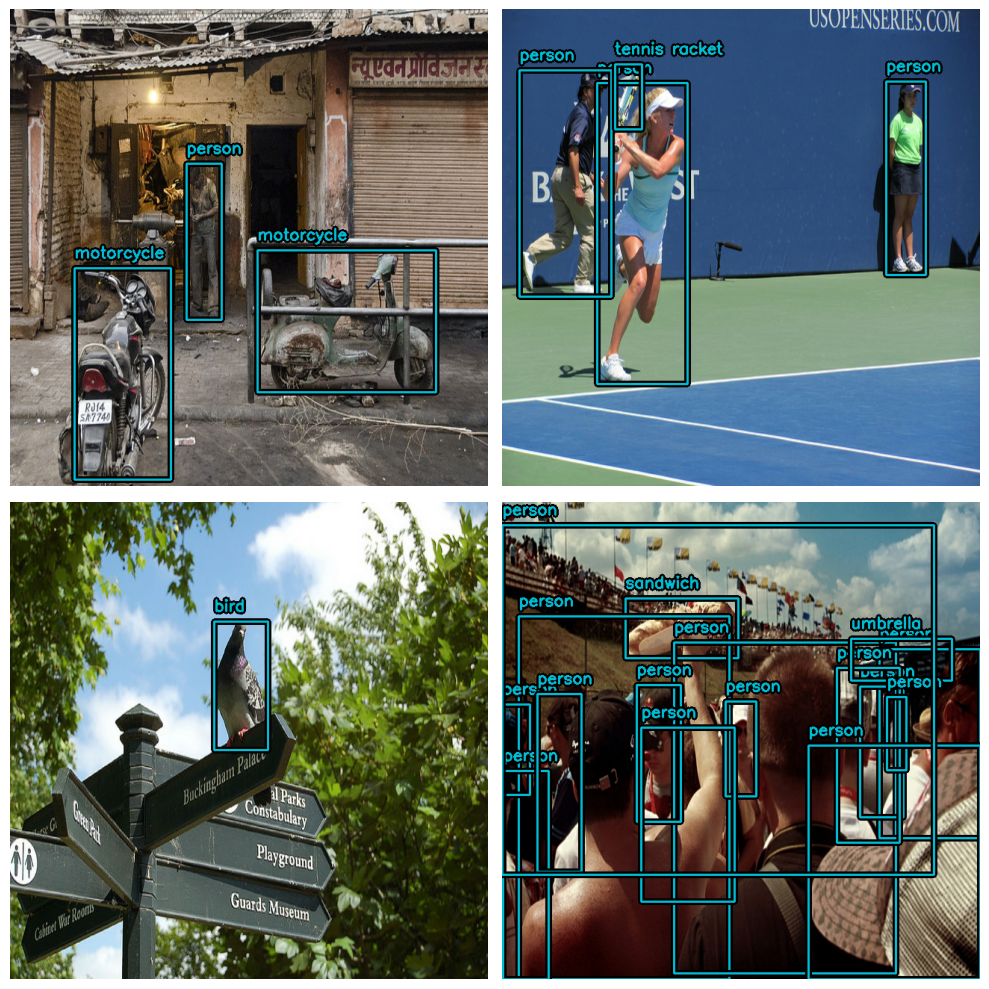

In [12]:
visualize_dataset(train_ds, bounding_box_format="xywh", value_range=(0, 255), rows=2, cols=2)

In [13]:
from keras_cv import bounding_box

def dict_to_tuple(inputs):
    return inputs["images"], bounding_box.to_dense(
        inputs["bounding_boxes"], max_boxes=32
    )


train_ds = train_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
eval_ds = eval_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
eval_ds = eval_ds.prefetch(tf.data.AUTOTUNE)

In [14]:
model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_backbone_coco",
    bounding_box_format="xywh",
    num_classes=80,
)

100%|██████████| 646/646 [00:00<00:00, 398kB/s]
100%|██████████| 45.6M/45.6M [00:01<00:00, 38.2MB/s]
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model.compile(
    optimizer=Adam(learning_rate=0.001),
    classification_loss="binary_crossentropy",
    box_loss="ciou"
)

In [16]:
coco_metrics_callback = keras_cv.callbacks.PyCOCOCallback(
    eval_ds, bounding_box_format="xywh"
)

In [17]:
callback = [
    ModelCheckpoint('model_best.h5', save_best_only=True, monitor='val_loss'),
    EarlyStopping(monitor='val_loss', patience=10)
]

In [19]:
model.fit(
    train_ds,
    validation_data = eval_ds,
    epochs=1,
    callbacks=[coco_metrics_callback, callback],
)

250/250 [==============================] - 26s 103ms/step
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.45s).
Accumulating evaluation results...
DONE (t=0.90s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Recall     (AR) 

In [26]:
def evaluate_model(model, dataset):
    accuracy = tf.keras.metrics.Accuracy()
    precision = tf.keras.metrics.Precision()
    recall = tf.keras.metrics.Recall()
    predictions = []
    labels = []

    for batch in dataset:
        x, y = batch
        preds = model.predict(x)

        # Extract the predicted classes and the actual classes
        pred_classes = preds['classes'][..., 0]  # Assuming we take the first index for simplification
        true_classes = y['classes']

        # Flatten predictions and true labels if they are in batch format
        predictions.extend(tf.reshape(pred_classes, [-1]).numpy())
        labels.extend(tf.reshape(true_classes, [-1]).numpy())

    # Only consider labels and predictions up to the smallest array length to ensure they match
    min_length = min(len(predictions), len(labels))
    predictions = tf.convert_to_tensor(predictions[:min_length], dtype=tf.float32)
    labels = tf.convert_to_tensor(labels[:min_length], dtype=tf.float32)

    # Update metric states
    accuracy.update_state(labels, predictions)
    precision.update_state(labels, predictions)
    recall.update_state(labels, predictions)

    print(f"Accuracy: {accuracy.result().numpy()}, Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}")

evaluate_model(model, eval_ds)

1/1 [==============================] - 0s 130ms/step
Accuracy: 0.2809999883174896, Precision: 0.9237147569656372, Recall: 0.5989247560501099
